<a href="https://colab.research.google.com/github/oyyarko/opencv_arko/blob/master/emotion_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%cd /content/drive/My Drive/Deep Learning/Emotion

!curl 'https://storage.googleapis.com/kaggle-data-sets/64677/127160/bundle/archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1589869496&Signature=SJ1zNI0dmq7D2bA5p1QHR0KsbJ9PQaWQdhxfMDWUWEB9kmUbt7P59SMT3HKqerarnD0kGH805JuR1eaKOIA7CZpcTu4eVrhiMRMrVvOa%2F51acImMAsJ2tBubOQS2snv%2F2ZxANEaGbiPTJvZKhhgBFuPAXM8MVU1pcYtKos%2BrJtobBipdjRoIjZxcxCloknZzdQdGg5zgM2TxsUVprVSuxqeRifXTXZwcVSI9clt6cNHNprReJjK6fY0g4eSO5V1ZQql2utg5LELm8dkt2LwDHtQGMeKnJ9fKmJ65A4GEYnildcPlbYer6GZfaCi6uWSB1Q1YjvmkFMLxLaFKihfAJw%3D%3D&response-content-disposition=attachment%3B+filename%3Dfacial-expression-recognitionferchallenge.zip' -H 'User-Agent: Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:76.0) Gecko/20100101 Firefox/76.0' -H 'Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,*/*;q=0.8' -H 'Accept-Language: en-US,en;q=0.5' --compressed -o data.zip

In [0]:
!unzip data.zip

In [0]:
import tensorflow as tf
tf.test.is_gpu_available()

In [0]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [9]:
#read csv
%cd /content/drive/My Drive/Deep Learning/Emotion/fer2013/fer2013
data = pd.read_csv('fer2013.csv')
data.head()

/content/drive/My Drive/Deep Learning/Emotion/fer2013/fer2013


,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [14]:
img_width, img_height = 48, 48

datapoints = data['pixels'].to_list()
#will append datapoint into this list
X = []
for xxseq in datapoints:
    xx = [int(sp) for sp in xxseq.split(' ')]
    xx = np.asarray(xx).reshape(img_width, img_height)
    X.append(xx.astype('float32'))

X = np.asarray(X)
X = np.expand_dims(X, -1)

y = pd.get_dummies(data['emotion']).to_numpy()
np.save('fdataX', X)
np.save('flabels', y)

print("Preprocessing Done")
print("No of features: ", str(len(X[0])))
print("No of labels: ", str(len(y[0])))
print("Total length of dataset: ", str(len(X)))

Preprocessing Done
No of features:  48
No of labels:  7
Total length of dataset:  35887


In [0]:
import os, sys
from keras.models import Sequential, load_model, model_from_json
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D
from keras.layers import Flatten, BatchNormalization, Activation
from keras.optimizers import Adam
from keras.losses import categorical_crossentropy
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

In [0]:
num_features = 64
img_width, img_height = 48, 48
batch_size = 64
epochs = 100
num_labels = 7

In [0]:
x = np.load('/content/drive/My Drive/Deep Learning/Emotion/fer2013/fer2013/fdataX.npy')
y = np.load('/content/drive/My Drive/Deep Learning/Emotion/fer2013/fer2013/flabels.npy')

x -= np.mean(x, axis=0)
x /= np.std(x, axis=0)

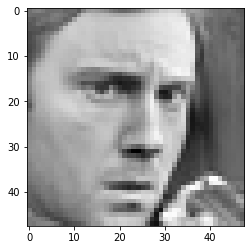

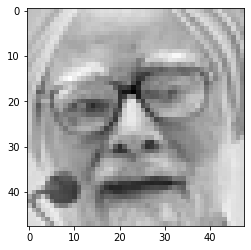

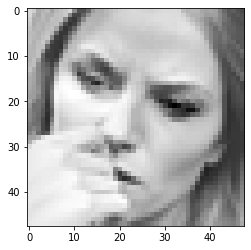

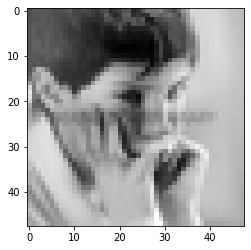

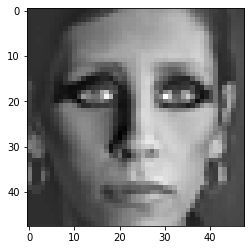

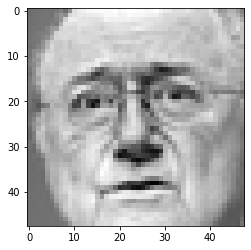

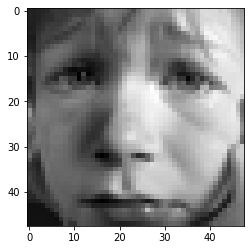

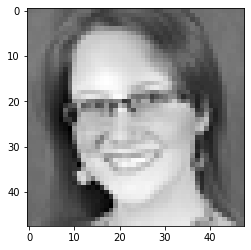

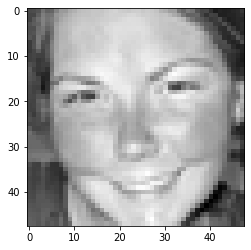

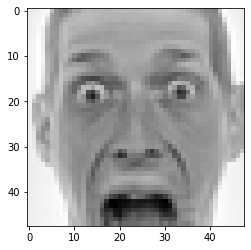

In [19]:
import matplotlib.pyplot as plt
for xx in range(10):
    plt.figure(xx)
    plt.imshow(x[xx].reshape((48,48)), cmap='gray')
plt.show()

In [0]:
#split data into train test valid
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.1, random_state=41)

In [21]:
x_train.shape

(29068, 48, 48, 1)

In [0]:
np.save('modeXtest', x_test)
np.save('modeytest', y_test)

In [24]:
#create model here
from keras.regularizers import l2
model = Sequential()
model.add(Conv2D(num_features, kernel_size=(3,3), activation='relu', input_shape=(img_width, img_height, 1), data_format='channels_last', kernel_regularizer=l2(0.01)))
model.add(Conv2D(num_features, kernel_size=(3,3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(2*num_features, kernel_size=(3,3), activation='relu', padding='same'))
model.add(Conv2D(2*num_features, kernel_size=(3,3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(2*2*num_features, kernel_size=(3,3), activation='relu', padding='same'))
model.add(Conv2D(2*2*num_features, kernel_size=(3,3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(2*2*2*num_features, kernel_size=(3,3), activation='relu', padding='same'))
model.add(Conv2D(2*2*2*num_features, kernel_size=(3,3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(2*2*2*num_features, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(2*2*num_features, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(2*num_features, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(num_labels, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 46, 46, 64)        640       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 46, 46, 64)        36928     
_________________________________________________________________
batch_normalization_1 (Batch (None, 46, 46, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 23, 23, 128)       73856     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 23, 23, 128)      

In [26]:
checkpoint = ModelCheckpoint('/content/drive/My Drive/Deep Learning/Emotion/fer2013/fer2013/fer.h5',
                             monitor='val_loss',
                             verbose=1,
                             save_best_only=True,
                             mode='min')

earlystop = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=8,
                          verbose=1,
                          mode='min',
                          restore_best_weights=True)

reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=8,
                              verbose=1,
                              mode='min',
                              min_delta=0.0001)

callbacks= [earlystop, checkpoint, reduce_lr]

model.compile(loss=categorical_crossentropy,
              optimizer=Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-7),
              metrics=['accuracy'])

model.fit(np.array(x_train), np.array(y_train),
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          callbacks= callbacks,
          validation_data=(np.array(x_valid), np.array(y_valid)),
          shuffle=True)

Train on 29068 samples, validate on 3230 samples
Epoch 1/100
29068/29068 [==============================] - 24s 835us/step - loss: 1.9541 - accuracy: 0.2137 - val_loss: 1.8065 - val_accuracy: 0.2607

Epoch 00001: val_loss improved from inf to 1.80650, saving model to /content/drive/My Drive/Deep Learning/Emotion/fer2013/fer2013/fer.h5
Epoch 2/100
29068/29068 [==============================] - 17s 575us/step - loss: 1.8197 - accuracy: 0.2524 - val_loss: 1.7271 - val_accuracy: 0.2910

Epoch 00002: val_loss improved from 1.80650 to 1.72707, saving model to /content/drive/My Drive/Deep Learning/Emotion/fer2013/fer2013/fer.h5
Epoch 3/100
29068/29068 [==============================] - 17s 579us/step - loss: 1.7122 - accuracy: 0.3094 - val_loss: 1.5425 - val_accuracy: 0.3910

Epoch 00003: val_loss improved from 1.72707 to 1.54252, saving model to /content/drive/My Drive/Deep Learning/Emotion/fer2013/fer2013/fer.h5
Epoch 4/100
29068/29068 [==============================] - 17s 581us/step - los

In [28]:
fer_json = model.to_json()
with open("fer.json", "w") as json_file:
    json_file.write(fer_json)
model.save_weights("/content/drive/My Drive/Deep Learning/Emotion/fer2013/fer2013/fer.h5'")
print("Saved model to disk")

Saved model to disk


In [30]:
from keras.models import model_from_json
json_file = open('/content/drive/My Drive/Deep Learning/Emotion/fer2013/fer2013/fer.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("/content/drive/My Drive/Deep Learning/Emotion/fer2013/fer2013/fer1.h5")
print("Loaded model from disk")

truey=[]
predy=[]
x = np.load('/content/drive/My Drive/Deep Learning/Emotion/fer2013/fer2013/modeXtest.npy')
y = np.load('/content/drive/My Drive/Deep Learning/Emotion/fer2013/fer2013/modeytest.npy')

yhat= loaded_model.predict(x)
yh = yhat.tolist()
yt = y.tolist()
count = 0

for i in range(len(y)):
    yy = max(yh[i])
    yyt = max(yt[i])
    predy.append(yh[i].index(yy))
    truey.append(yt[i].index(yyt))
    if(yh[i].index(yy)== yt[i].index(yyt)):
        count+=1

acc = (count/len(y))*100

#saving values for confusion matrix and analysis
np.save('truey', truey)
np.save('predy', predy)
print("Predicted and true label values saved")
print("Accuracy on test set :"+str(acc)+"%")

Loaded model from disk
Predicted and true label values saved
Accuracy on test set :63.49958205628309%


[[282   0  30  32  75  12  67]
 [ 43   0   0   0   5   2   2]
 [ 73   0 150  33 160  74  55]
 [ 22   0   5 787  24  14  29]
 [ 65   0  30  36 327   0 130]
 [ 12   0  35  34   4 310  19]
 [ 43   1   9  52  77   6 423]]


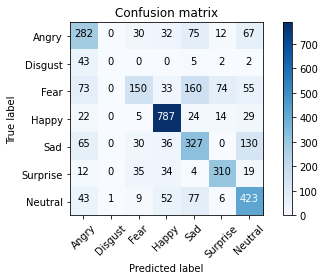

In [31]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

y_true = np.load('/content/drive/My Drive/Deep Learning/Emotion/fer2013/fer2013/truey.npy')
y_pred = np.load('/content/drive/My Drive/Deep Learning/Emotion/fer2013/fer2013/predy.npy')
cm = confusion_matrix(y_true, y_pred)
labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
title='Confusion matrix'
print(cm)

plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title(title)
plt.colorbar()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels, rotation=45)
plt.yticks(tick_marks, labels)
fmt = 'd'
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()

In [32]:
!wget https://thetimeshub.in/wp-content/uploads/2020/04/b6973666efe82098306e8644cb4dc640.jpg

--2020-05-16 07:46:06--  https://thetimeshub.in/wp-content/uploads/2020/04/b6973666efe82098306e8644cb4dc640.jpg
Resolving thetimeshub.in (thetimeshub.in)... 104.28.11.41, 104.28.10.41, 2606:4700:3034::681c:b29, ...
Connecting to thetimeshub.in (thetimeshub.in)|104.28.11.41|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 153275 (150K) [image/jpeg]
Saving to: ‘b6973666efe82098306e8644cb4dc640.jpg’

b6973666efe82098306 100%[===================>] 149.68K  --.-KB/s    in 0.03s   

2020-05-16 07:46:06 (5.77 MB/s) - ‘b6973666efe82098306e8644cb4dc640.jpg’ saved [153275/153275]



Loaded model from disk
Image Loaded
Emotion: Happy


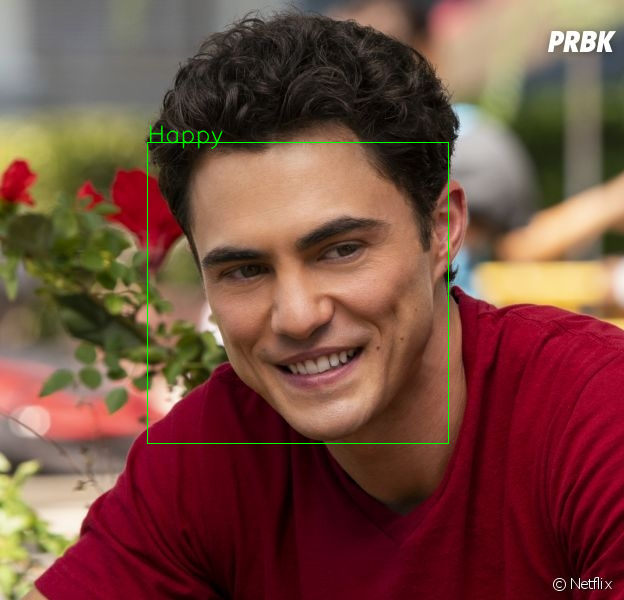

-1

In [43]:
import cv2
from google.colab.patches import cv2_imshow

#loading the model
json_file = open('/content/drive/My Drive/Deep Learning/Emotion/fer2013/fer2013/fer.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("/content/drive/My Drive/Deep Learning/Emotion/fer2013/fer2013/fer1.h5")
print("Loaded model from disk")

#setting image resizing parameters
WIDTH = 48
HEIGHT = 48
x=None
y=None
labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

#loading image
full_size_image = cv2.imread("/content/drive/My Drive/Deep Learning/Emotion/fer2013/fer2013/image.jpg")
print("Image Loaded")
gray=cv2.cvtColor(full_size_image,cv2.COLOR_RGB2GRAY)
face = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
faces = face.detectMultiScale(gray, 1.3  , 10)

#detecting faces
for (x, y, w, h) in faces:
        roi_gray = gray[y:y + h, x:x + w]
        cropped_img = np.expand_dims(np.expand_dims(cv2.resize(roi_gray, (48, 48)), -1), 0)
        cv2.normalize(cropped_img, cropped_img, alpha=0, beta=1, norm_type=cv2.NORM_L2, dtype=cv2.CV_32F)
        cv2.rectangle(full_size_image, (x, y), (x + w, y + h), (0, 255, 0), 1)
        #predicting the emotion
        yhat= loaded_model.predict(cropped_img)
        cv2.putText(full_size_image, labels[int(np.argmax(yhat))], (x, y), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 1, cv2.LINE_AA)
        print("Emotion: "+labels[int(np.argmax(yhat))])

cv2_imshow(full_size_image)
cv2.waitKey()